In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from io import BytesIO

True


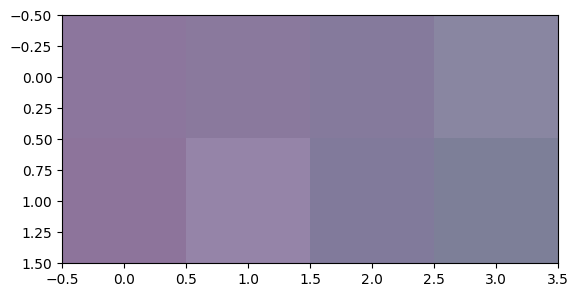

In [55]:
with open('resources/img.shape', "rb") as f:
    shape = int.from_bytes(f.read(4), 'little'), int.from_bytes(f.read(4), 'little')

img_r = np.fromfile('resources/img_r.mat', dtype=np.uint8).reshape(shape)
img_g = np.fromfile('resources/img_g.mat', dtype=np.uint8).reshape(shape)
img_b = np.fromfile('resources/img_b.mat', dtype=np.uint8).reshape(shape)

print(np.any(img_r!=img_g))

img = np.array([img_b, img_g, img_r]).transpose((1, 2, 0))

plt.imshow(img)
plt.show()

In [66]:

fft_r = np.fromfile('output/fft_r.mat', dtype=np.float32).reshape(shape)
fft_g = np.fromfile('output/fft_g.mat', dtype=np.float32).reshape(shape)
fft_b = np.fromfile('output/fft_b.mat', dtype=np.float32).reshape(shape)

expected_fft_r = fft(img_r)
expected_fft_g = fft(img_g)
expected_fft_b = fft(img_b)

print(expected_fft_r/(shape[0]*shape[1]))
print(fft_r)
print()

[[631. -0.j   1. +4.j  -5. -0.j   1. -4.j]
 [630. -0.j   0.-16.j -10. -0.j   0.+16.j]]
[[78.8125 78.8125  0.      0.    ]
 [-0.9375 -0.9375  0.      0.    ]]



In [47]:
test_arr = np.array([1 + 2j, 2 + 3j, 3 + 4j, 4 + 5j])
fft(test_arr)

array([10.+14.j, -4. +0.j, -2. -2.j,  0. -4.j])